##Data Downloading and Data Preparations

In [ ]:
cd "/content/drive/MyDrive/Holiday"

/content/drive/MyDrive/Holiday


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d oossiiris/hackerearth-deep-learning-challenge-holidayseason

In [ ]:
!unzip /content/drive/MyDrive/Holiday/hackerearth-deep-learning-challenge-holidayseason.zip  && rm /content/drive/MyDrive/Holiday/hackerearth-deep-learning-challenge-holidayseason.zip


In [ ]:
import pandas as pd

traindataset  =pd.read_csv("/content/drive/MyDrive/Holiday/dataset/train.csv") 

In [ ]:
traindataset.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [ ]:
traindataset["Class"].value_counts()

Miscellaneous     2801
Christmas_Tree    1539
Jacket             640
Candle             593
Airplane           535
Snowman            361
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train,valid = train_test_split(traindataset,test_size = 0.12,stratify = traindataset.Class.values,shuffle = True)

In [ ]:
train.reset_index(inplace = True,drop = True)
valid.reset_index(inplace = True,drop = True)

In [ ]:
train["Class"].value_counts()

Miscellaneous     2464
Christmas_Tree    1354
Jacket             563
Candle             522
Airplane           471
Snowman            318
Name: Class, dtype: int64

## Model Training

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing import image

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
trainset  = train_datagen.flow_from_dataframe(train,directory = "/content/drive/MyDrive/Holiday/dataset/train",x_col = "Image",y_col = "Class",class_mode = "categorical",target_size = (299,299),batch_size = 32)

Found 5692 validated image filenames belonging to 6 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale = 1./255)
validset  = valid_datagen.flow_from_dataframe(valid,directory = "/content/drive/MyDrive/Holiday/dataset/train",x_col = "Image",y_col = "Class",class_mode = "categorical",target_size = (299,299),batch_size = 32)

Found 777 validated image filenames belonging to 6 classes.


In [ ]:
x_batch,y_batch = next(trainset)

In [ ]:
pip install ipyplot


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        



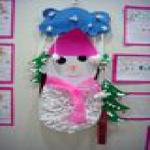
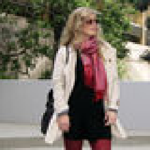
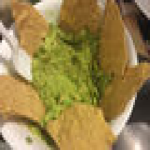
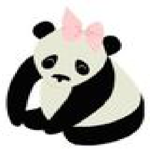
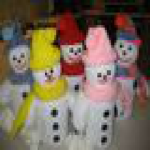
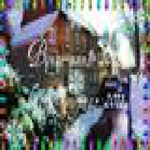
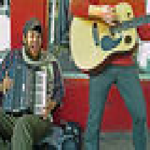
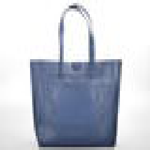
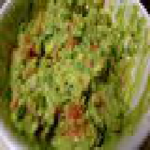
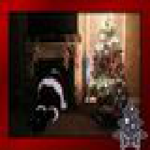
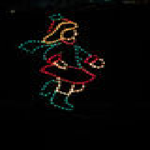
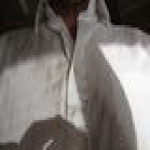
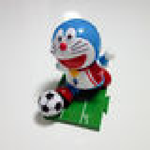
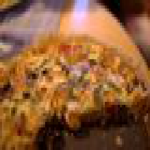
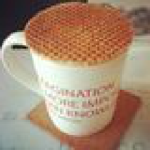
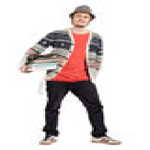
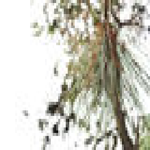
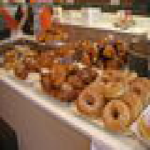
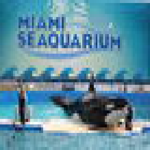
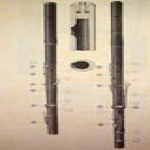


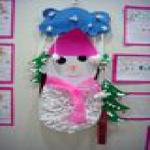
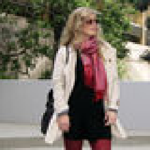
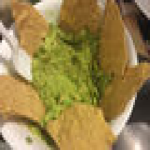
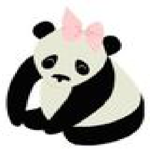
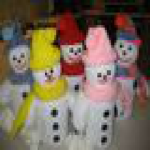
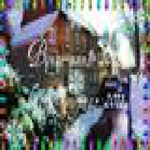
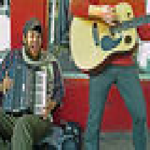
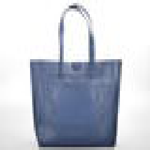
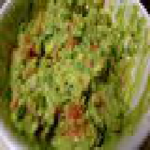
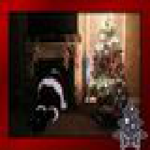
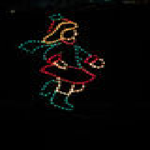
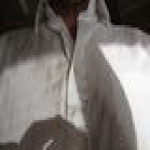
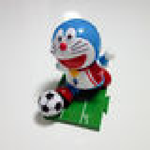
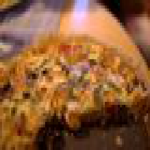
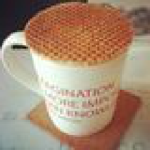
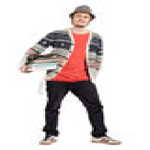
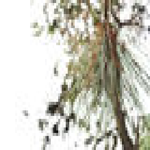
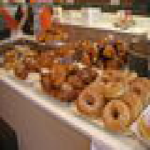
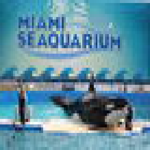
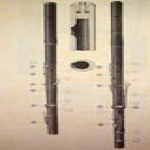

In [ ]:
import ipyplot

ipyplot.plot_images(x_batch, max_images=20, img_width=150)

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.models import Model
from keras.layers import *

In [ ]:
incep = InceptionResNetV2(input_shape = [299,299,3],weights = 'imagenet',include_top = False)
for layer in incep.layers:
  layer.trainable = False

  x = Flatten()(incep.output)
  prediction_layer = Dense(6,activation = 'softmax')(x)

  model = Model(incep.input,outputs = prediction_layer)

219062272/219055592 [==============================] - 3s 0us/step


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
r = model.fit_generator(trainset,
  validation_data=validset,
  epochs=12,
  steps_per_epoch=trainset.n//32,
  validation_steps=validset.n//32
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
177/177 [==============================] - 4891s 28s/step - loss: 4.4442 - accuracy: 0.7064 - val_loss: 1.8674 - val_accuracy: 0.8698
Epoch 2/12
177/177 [==============================] - 39s 221ms/step - loss: 0.7199 - accuracy: 0.9329 - val_loss: 1.7029 - val_accuracy: 0.8919
Epoch 3/12
177/177 [==============================] - 39s 221ms/step - loss: 0.5644 - accuracy: 0.9542 - val_loss: 2.1313 - val_accuracy: 0.8815
Epoch 4/12
177/177 [==============================] - 39s 220ms/step - loss: 0.4008 - accuracy: 0.9688 - val_loss: 2.0402 - val_accuracy: 0.8945
Epoch 5/12
177/177 [==============================] - 39s 220ms/step - loss: 0.3577 - accuracy: 0.9722 - val_loss: 2.2254 - val_accuracy: 0.9049
Epoch 6/12
177/177 [==============================] - 39s 220ms/step - loss: 0.2214 - accuracy: 0.9844 - val_loss: 2.3345 - val_accuracy: 0.9076
Epoch 7/12
177/177 [==============================] - 39s 221ms/step - loss: 0.4252 - accuracy: 0.9781 - val_loss: 3.5297 - val_ac

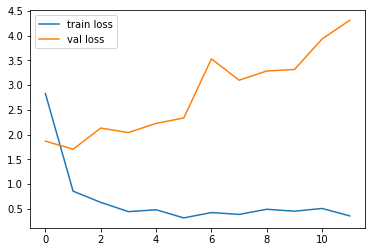

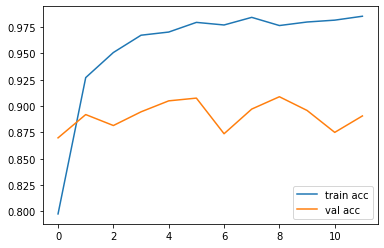

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')